# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Henry Anand Septian Radityo
- **Email:** henryanandseptianradityo@gmail.com
- **ID Dicoding:** henry_anand

## Menentukan Pertanyaan Bisnis

- Metode pembayaran apa yang paling digemari oleh pengguna?
- Apakah persebaran lokasi penjual sudah merata?

## Import Semua Packages/Library yang Digunakan

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Wrangling

### Gathering Data

In [33]:
seller_df = pd.read_csv("./data/sellers_dataset.csv")
seller_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [34]:
payment_df = pd.read_csv("./data/order_payments_dataset.csv")
payment_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [35]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [36]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


**Insight:**
- Terdapat 3095 baris dan 4 kolom di tabel penjual dan 103886 baris dan 5 kolom di tabel pembayaran
- Dari 2 tabel yang diimpor, terdapat 3 tipe data berbeda yaitu object, int64, dan float64

### Assessing Data

Dilakukan pemeriksaan untuk data sebelum dilakukan analisis, yaitu pengecekan umum untuk data outlier, data kosong, duplikat dan masalah lainnya.

In [37]:
# Payment
payment_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [38]:
# Seller
seller_df.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [39]:
# Payment
payment_df.duplicated().sum()

0

In [40]:
# seller
seller_df.duplicated().sum()

0

In [41]:
# Payment
payment_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [42]:
# Seller
seller_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [43]:
data = payment_df['payment_value']
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off
outliers = [x for x in data if x < minimum or x > maximum]

**Insight:**
- Tidak dijumpai adanya data kosong dan duplikat di seller maupun payment
- Outliers dideteksi untuk beberapa transaksi yang memiliki nilai besar dan kecil

### Cleaning Data

In [44]:
payment_df = payment_df[(data >= minimum) & (data <= maximum)]

In [45]:
payment_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103879,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94
103880,7159096c5aa9be77f7f0c26c01ee9793,1,credit_card,4,280.65
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77


**Insight:**
- Dilakukan drop data untuk transaksi yang outliers
- Terdapat pengurangan jumlah data untuk tabel payment dari 103886 ke 95905

## Exploratory Data Analysis (EDA)

Dilakukan eksplorasi lebih lanjut untuk mendapatkan insight dari data payment dan seller

In [46]:
payment_df.describe()

,payment_sequential,payment_installments,payment_value
count,95905.000000,95905.000000,95905.000000
mean,1.099546,2.628320,110.062133
std,0.734353,2.451581,72.785054
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,54.000000
50%,1.000000,1.000000,92.200000
75%,1.000000,3.000000,150.580000
max,29.000000,24.000000,344.340000


In [47]:
seller_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [48]:
print("Payment columns: ", payment_df.columns.tolist())
print("Seller columns: ",seller_df.columns.tolist())

Payment columns:  ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']
Seller columns:  ['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']


In [49]:
payment_df['payment_type'].value_counts()

payment_type
credit_card    70269
boleto         18504
voucher         5685
debit_card      1444
not_defined        3
Name: count, dtype: int64

In [50]:
seller_df['seller_city'].value_counts()

seller_city
sao paulo              694
curitiba               127
rio de janeiro          96
belo horizonte          68
ribeirao preto          52
                      ... 
taruma                   1
s jose do rio preto      1
domingos martins         1
messias targino          1
leme                     1
Name: count, Length: 611, dtype: int64

<Axes: >

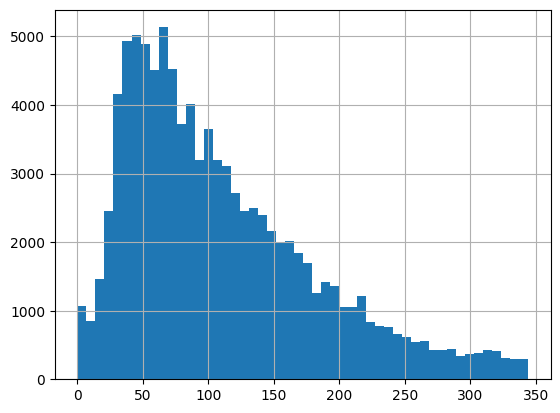

In [51]:
payment_df['payment_value'].hist(bins=50)

<Axes: xlabel='payment_type'>

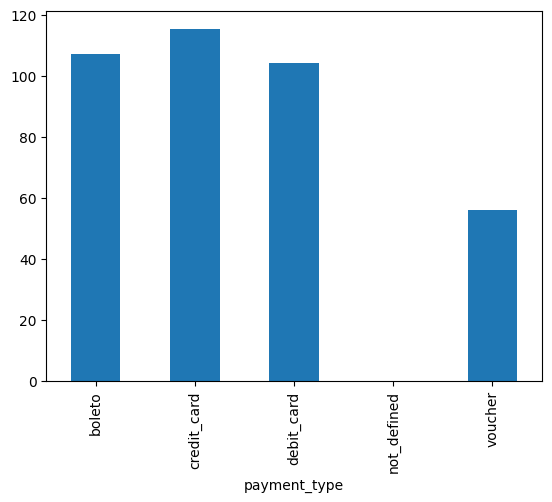

In [52]:
payment_df.groupby('payment_type')['payment_value'].mean().plot(kind='bar')

**Insight:**
- Tipe pembayaran dibagi menjadi 5 tipe yang berbeda yaitu boleto, credit_card, debit_Card, not_defined, dan voucher
- Boleto, credit card, dan debit card memiliki nilai rata-rata transaksi yang mirip
- Persebaran data untuk payment value bersifat skew left
- Seller terbagi di 611 kota yang berbeda

## Visualization & Explanatory Analysis

### Pertanyaan 1: Metode pembayaran apa yang paling digemari oleh pengguna?

In [53]:
data = payment_df['payment_type'].value_counts()
data

payment_type
credit_card    70269
boleto         18504
voucher         5685
debit_card      1444
not_defined        3
Name: count, dtype: int64

Text(0, 0.5, 'Count')

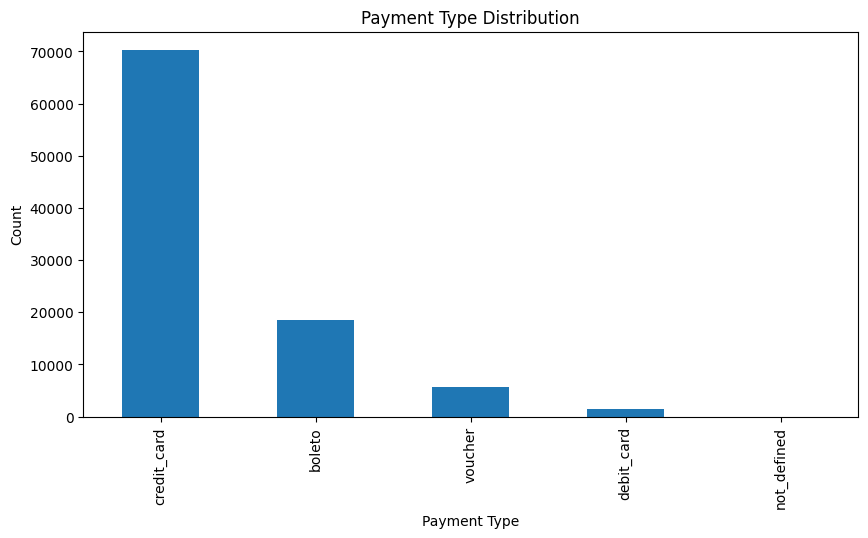

In [54]:
plt.figure(figsize=(10,5))
data.plot(kind='bar')
plt.title('Payment Type Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Count')

### Pertanyaan 2: Apakah persebaran lokasi penjual sudah merata?

In [55]:
seller_city = seller_df['seller_city'].value_counts()
seller_city = seller_city[:5]

Text(0, 0.5, 'Count')

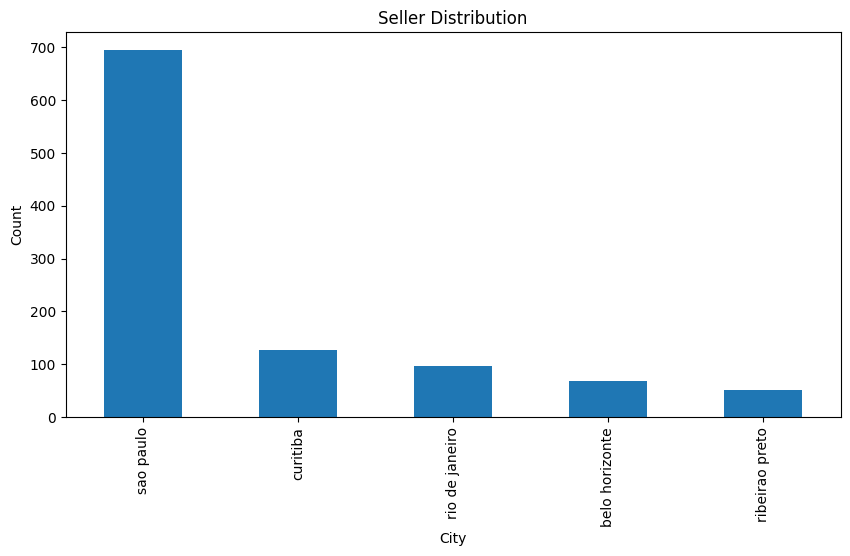

In [56]:
plt.figure(figsize=(10,5))
seller_city.plot(kind='bar')
plt.title('Seller Distribution')
plt.xlabel('City')
plt.ylabel('Count')

In [57]:
min_count = seller_df['seller_city'].value_counts().min()
min_count_seller = [city for city, count in seller_df['seller_city'].value_counts().items() if count == min_count]
print(min_count_seller)

['taio', 'colorado', 'santa cruz do sul', 'bage', 'jaragua', 'marica', 'governador valadares', 'garulhos', 'picarras', 'triunfo', 'campo magro', 'sapiranga', 'itapema', 'sao jose do rio pret', 'alvorada', 'nova trento', 'sao luis', 'ipaussu', 'camboriu', 'rio verde', 'ribeirao preto / sao paulo', 'paranavai', 'eusebio', 'nova petropolis', 'mage', 'tabao da serra', 'jarinu', 'bofete', 'rio de janeiro, rio de janeiro, brasil', 'barbacena', 'descalvado', 'sao pedro da aldeia', 'castro pires', 'riberao preto', 'fernando prestes', 'aparecida de goiania', 'bandeirantes', 'carmo do cajuru', 'ao bernardo do campo', 'vitoria de santo antao', 'portao', 'pinhais/pr', 'sao vicente', 'sao  paulo', 'ronda alta', 'angra dos reis rj', 'olimpia', 'extrema', 'palotina', 'campina das missoes', 'miguelopolis', 'pouso alegre', 'itapui', 'timoteo', 'muqui', 'erechim', 'buritama', 'ipua', 'caieiras', 'jussara', 'nova lima', 'varzea paulista', 'mineiros do tiete', 'neopolis', 'sbc', 'jacarei / sao paulo', 'va

In [58]:
len(min_count_seller)

342

**Insight:**
- Metode pembayaran paling favorit adalah credit card dengan jumlah transaksi mencapai 70259 disusul dengan boleto dengan jumlah transaksi mencapai 18504
- Kota penjual cenderung tidak merata dikarenakan terdapat hampir 700 penjual di satu kota sedangkan di urutan kedua yaitu kota curitiba hanya memiliki sekitar 100 penjual
- Terdapat 342 kota dengan hanya 1 penjual yang menjadikan data persebaran penjual sangat tidak merata

## Analisis Lanjutan (Opsional)

Dibuat analisis untuk opsi jumlah pembayaran berdasarkan besar transaksi sebagai berikut

In [75]:
cheap = len([x for x in payment_df['payment_value'] if x <= 25])
medium = len([x for x in payment_df['payment_value'] if x <= 100 and x > 25])
expensive = len([x for x in payment_df['payment_value'] if x > 100])

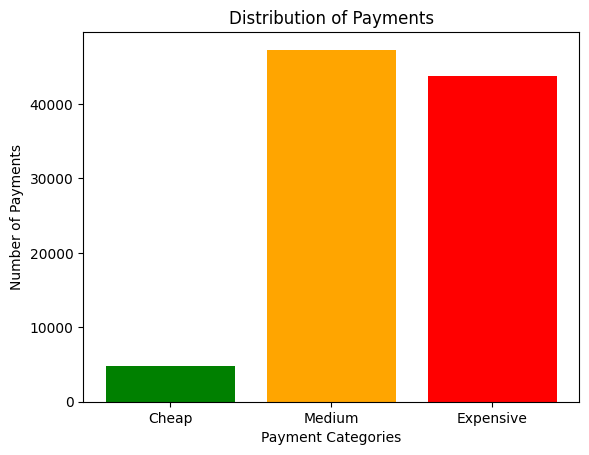

In [76]:
categories = ['Cheap', 'Medium', 'Expensive']
counts = [cheap, medium, expensive]

# Create a bar plot
plt.bar(categories, counts, color=['green', 'orange', 'red'])
plt.xlabel('Payment Categories')
plt.ylabel('Number of Payments')
plt.title('Distribution of Payments')
plt.show()

- Mayoritas transaksi ada diatas $100 yaitu tipe medium dan expensive

- Jumlah transaksi dibawah $25 paling sedikit frekuensinya

## Conclusion

- Metode pembayaran paling favorit dari banyaknya transaksi adalah credit card
- Persebaran penjual masih belum merata dengana adanya satu kota yang memiliki jumlah penjual lebih dari 700 sedangkan di 300 kota lain hanya memiliki satu penjual